In [1]:
import numpy as np
import matplotlib.pyplot as plt

    fjac: array([[-5.27206304e-02,  8.49572169e-04, -9.98608939e-01],
       [-8.62644339e-01, -5.03795077e-01,  4.51138993e-02],
       [-5.03055940e-01,  8.63822782e-01,  2.72932727e-02]])
     fun: array([-1.12576615e-12,  2.05073241e-12, -4.85089746e-11])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.68019880e-08,  1.13005212e-09, -4.17813808e-10])
       r: array([ 1.22006426e+01,  1.55842589e+01,  8.11981055e-02, -5.56716664e-01,
       -8.19541930e-03,  6.85265518e-03])
  status: 1
 success: True
       x: array([  2.77385398,  -1.72572715, 121.84065742])
-1.1257661469699087e-12 -4.8508974614946965e-11


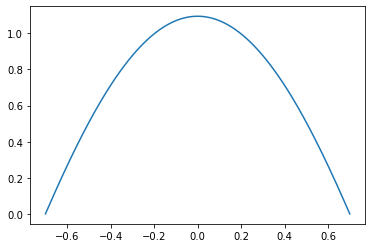

In [177]:
from scipy.optimize import root
from scipy.integrate import solve_ivp

def dddf(t,y,q,nu):
    return [y[1],
            y[2],
            2*q/nu*y[1]*y[0]-4*y[1]]


def conditions(x,b,q,nu):
    res = solve_ivp(dddf,(-b, b),[0,x[0],x[1]],args=(q,nu),max_step=0.001)
    return [q-np.trapz(res.y[0],res.t),
            res.y[0][-1],
           np.sum(np.interp(np.linspace(-b,0),res.t,res.y[0])
                  -np.interp(np.linspace(0,b),res.t,res.y[0]))]

bounds=0.7
q = 1
nu = 1
r = root(conditions,[10,-22,0],args=(bounds,q,nu))
print(r)
res = solve_ivp(dddf,(-bounds, bounds),[0,r.x[0],r.x[1]],args=(q,nu),max_step=0.001)
plt.plot(res.t,res.y[0])
print(1-np.trapz(res.y[0],res.t),np.sum(np.interp(np.linspace(-bounds,0),res.t,res.y[0])-np.interp(np.linspace(0,bounds),res.t,res.y[0])))

(array([-2.20043722]), array([[1.10528124e-06]]))


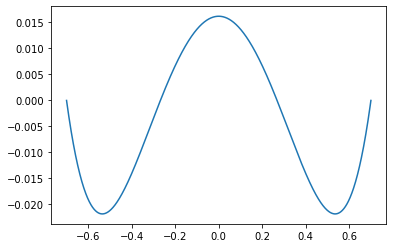

In [179]:
from scipy.optimize import curve_fit

cos = lambda x,a,b: a*np.cos(b*x)
x2 = lambda x,a,b: a*x**2+b
x2_stuck = lambda x,a: a*(x-bounds)*(x+bounds)


fit = curve_fit(x2_stuck,res.t,res.y[0])
print(fit)
plt.plot(res.t,res.y[0]-x2_stuck(res.t,*fit[0]))
#plt.plot(res.t,)
#plt.xlim(-0.01,0.01)
#plt.ylim(2.5,2.502)
#plt.xlim(0.29,0.301)
#plt.ylim(0,0.1)

In [173]:
bound_check =  np.linspace(0.04,0.71)
fits = []
for b in bound_check:
    r = root(conditions,[10,-22,0],args=(b,q,nu))
    res = solve_ivp(dddf,(-b, b),[0,r.x[0],r.x[1]],args=(q,nu),max_step=0.001)
    fits.append(curve_fit(x2_stuck,res.t,res.y[0]))

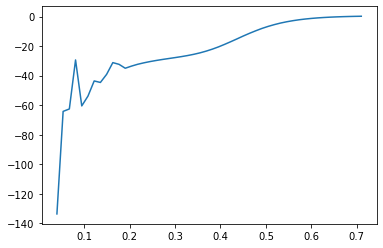

In [174]:
plt.plot(bound_check,[i[0][0] for i in fits])
plt.show()
#plt.plot(bound_check,[i[0][1] for i in fits])

Text(0, 0.5, 'error')

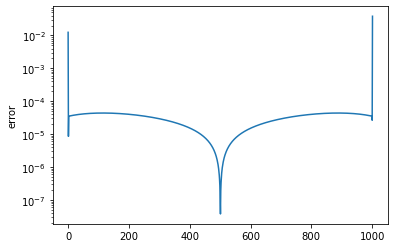

In [107]:
#Check that integral is correct

plt.semilogy(np.abs(np.gradient(res.y[2],res.t) - (2*res.y[0]-4)*res.y[1]))

plt.ylabel("error")

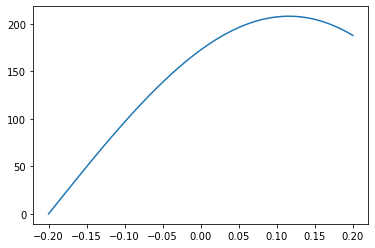

In [72]:
res = solve_ivp(dddf,(-0.2, 0.2),[0,-10,1000],args=(1,1),max_step=0.01)
plt.plot(res.t,res.y[0])
#np.sum(np.interp(np.linspace(-0.2,0),res.t,res.y[0])-np.interp(np.linspace(0,0.2),res.t,res.y[0]))

1.0681498135873182 2.3576214419439827


0.7853981633974483

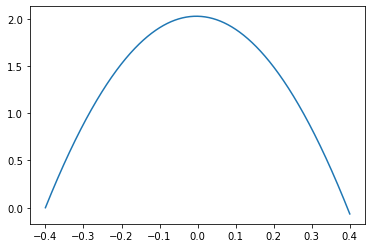

In [271]:
res = solve_ivp(dddf,(-0.40, 0.40),[0,10,-22],args=(1,1),max_step=0.001)
plt.plot(res.t,res.y[0])
print(np.trapz(res.y[0],res.t),np.sum(np.interp(np.linspace(-bounds,0),res.t,res.y[0])-np.interp(np.linspace(0,bounds),res.t,res.y[0])))
np.pi/4